In [1]:

### uncomment only if you load directory in google drive ####

# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.insert(0,'/content/drive/My Drive/PCGRL_CarRacing')
# import os
# os.chdir('/content/drive/My Drive/PCGRL_CarRacing')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd

/content/drive/My Drive/PCGRL_CarRacing


In [3]:
import torch

# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


```
# Run the following block once only for installation
```

In [ ]:
!pip install Box2D
!pip install stable-baselines[mpi]==2.8.0
!pip install tensorflow==1.14.0
!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet==1.5.11
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym==0.21.0
!pip install pyvirtualdisplay==0.2.5 > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1

In [ ]:
import gym

import os
import time

from track_generation_env_test import TrackGenerationEnv
    
from stable_baselines import PPO2, A2C
from stable_baselines.common.vec_env import DummyVecEnv, VecNormalize
from stable_baselines.bench import Monitor
from stable_baselines import results_plotter
from stable_baselines.results_plotter import load_results, ts2xy
# from stable_baselines.common.callbacks import BaseCallback

In [7]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1001'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [8]:
# %load_ext tensorboard
# %tensorboard --logdir content/drive/MyDrive/PCGRL_CarRacing/pcgrl_checkpoints

In [ ]:
# Parallel environments
log_dir = "/tmp/gym/{}".format(int(time.time()))
os.makedirs(log_dir, exist_ok=True)
envs=[]
model = PPO2.load('car_racing_weights.pkl')
# Create and wrap the environment

def make_env():
  env=TrackGenerationEnv()
  env.set_ppo_model(model)
  return env
env = DummyVecEnv([make_env for _ in range(6)])
model = PPO2("MlpPolicy", env, n_steps=16, verbose=1)

avg_reward = []
all_rewards = []
for i in range(20):
    print("epoch:\t", i)
    model.learn(total_timesteps=96)
    rewards_lst = []
    with open ('rewards.txt') as f:
      for line in f:
        rewards_lst.append(float(line))
    avg_reward.append(sum(rewards_lst)/len(rewards_lst))
    all_rewards.extend(rewards_lst)


  

In [11]:
with open('avg_reward.txt', 'w') as f:
  for reward in avg_reward:
    f.write(str(reward) + "\n")
f.close()

In [12]:
model.save("ppo_track_gen")

KeyboardInterrupt: ignored

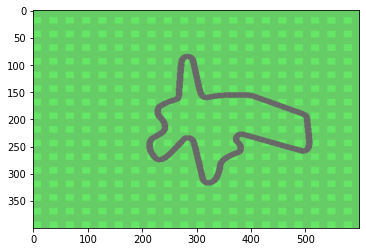

In [13]:
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
display = Display(visible=0, size=(600, 400))
display.start()
env = TrackGenerationEnv()
env.set_ppo_model(PPO2.load('car_racing_weights.pkl'))
obs = env.reset()
while True:
  action, _states = model.predict(obs)
  obs, rewards, dones, info = env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

ipythondisplay.clear_output(wait=True)
